In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/ark.csv')
df

,Id,Age,Gender,Purchased
0,id1,<25,Male,No
1,id2,<25,Female,No
2,id3,<25,Female,Yes
3,id4,<25,Male,No
4,id5,25+,Male,No
...,...,...,...,...
79995,id79996,<25,Female,No
79996,id79997,<25,Male,No
79997,id79998,<25,Female,No
79998,id79999,<25,Female,No


In [46]:
df['Purchased'] = df['Purchased'].apply(lambda x: 1 if x == 'Yes' else 0)
df

,Id,Age,Gender,Purchased
0,id1,<25,Male,0
1,id2,<25,Female,0
2,id3,<25,Female,1
3,id4,<25,Male,0
4,id5,25+,Male,0
...,...,...,...,...
79995,id79996,<25,Female,0
79996,id79997,<25,Male,0
79997,id79998,<25,Female,0
79998,id79999,<25,Female,0


In [47]:
conversion_real = df['Purchased'].mean()

conversion_samples_random_400 = []
for _ in range(10000):
  sample = df.sample(400)
  conversion_samples_random_400.append(sample['Purchased'].mean())
conversion_real

0.168175

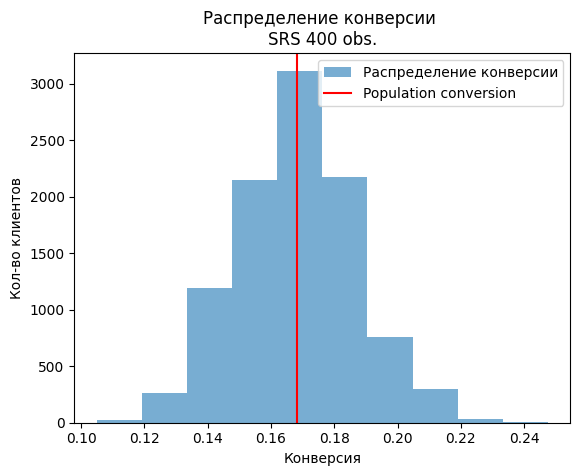

In [48]:
plt.hist(conversion_samples_random_400, label = 'Распределение конверсии', alpha = .6)
plt.axvline(conversion_real, label = 'Population conversion', color = 'red')
plt.legend(loc = 'upper right')
plt.title('Распределение конверсии \nSRS 400 obs.')
plt.xlabel('Конверсия')
plt.ylabel('Кол-во клиентов')
plt.show()

Красный

In [49]:
def stratified_sample(df, strata_col, frac):
    groups = df.groupby(strata_col)
    sample = pd.DataFrame()

    for _, group in groups:
        stratum_sample = group.sample(frac=frac, replace=False)
        sample = pd.concat([sample,stratum_sample])

    return sample

In [50]:
conversion_real = df['Purchased'].mean()

conversion_samples_stratified_400 = []
for _ in range(1000):
  sample = stratified_sample(df, ['Gender', 'Age'], 400 / df.shape[0])
  conversion_samples_stratified_400.append(sample['Purchased'].mean())
conversion_real

0.168175

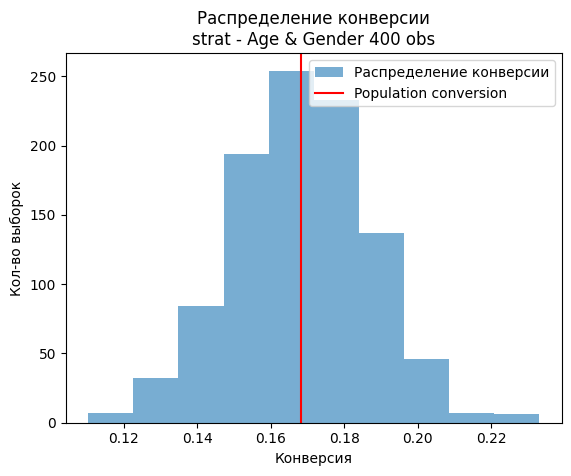

In [51]:
plt.hist(conversion_samples_stratified_400, label = 'Распределение конверсии', alpha = .6)
plt.axvline(conversion_real, label = 'Population conversion', color = 'red')
plt.legend(loc = 'upper right')
plt.title('Распределение конверсии\nstrat - Age & Gender 400 obs')
plt.xlabel('Конверсия')
plt.ylabel('Кол-во выборок')
plt.show()

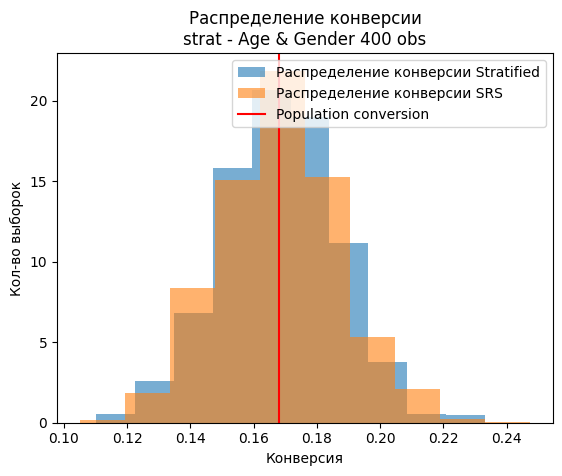

In [53]:
plt.hist(conversion_samples_stratified_400, label = 'Распределение конверсии Stratified', alpha = .6, density=True)
plt.hist(conversion_samples_random_400, label = 'Распределение конверсии SRS', alpha = .6, density=True)
plt.axvline(conversion_real, label = 'Population conversion', color = 'red')
plt.legend(loc = 'upper right')
plt.title('Распределение конверсии\nstrat - Age & Gender 400 obs')
plt.xlabel('Конверсия')
plt.ylabel('Кол-во выборок')
plt.show()